In [1]:
import cv2
import numpy as np
import os

# 设置原始视频文件夹路径
input_folder = "C:/Users/Administrator/Desktop/output"  # 替换为你的输入文件夹路径
output_file = 'C:/Users/Administrator/Desktop/combined_video.mp4'   # 输出文件名

# 指定视频的顺序
video_indices = [1, 2, 3]  # 假设你的视频编号从1到3

# 收集视频文件名
original_videos = []
segmentation_videos = []
for index in video_indices:
    original_videos.append(os.path.join(input_folder, f'resized_test_video{index}.mp4'))
    segmentation_videos.append(os.path.join(input_folder, f'resized_output_video{index}.mp4'))

# 确保视频数量匹配
if len(original_videos) != len(segmentation_videos):
    print("原始视频和分割视频数量不匹配！")
    exit()

# 初始化VideoCapture对象
caps = [cv2.VideoCapture(v) for v in original_videos + segmentation_videos]

# 获取视频帧的宽高
frame_width = int(caps[0].get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(caps[0].get(cv2.CAP_PROP_FRAME_HEIGHT))

# 设置输出视频的参数
output_width = frame_width * 3
output_height = frame_height * 2
fps = caps[0].get(cv2.CAP_PROP_FPS)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')

# 创建 VideoWriter 对象
out = cv2.VideoWriter(output_file, fourcc, fps, (output_width, output_height))

while True:
    frames = []

    # 读取所有视频的当前帧
    for cap in caps:
        ret, frame = cap.read()
        if not ret:
            frames.append(None)  # 添加空帧以保持一致性
        else:
            # Resize frame if needed
            frame = cv2.resize(frame, (frame_width, frame_height))
            frames.append(frame)

    # 检查是否所有视频都已经结束
    if all(frame is None for frame in frames):
        break

    # 创建一个大画面
    top_row = np.hstack((frames[0], frames[1], frames[2]))
    bottom_row = np.hstack((frames[3], frames[4], frames[5]))
    combined_frame = np.vstack((top_row, bottom_row))

    # 写入合成帧到输出文件
    out.write(combined_frame)

# 释放资源
for cap in caps:
    cap.release()
out.release()

print('视频合并完成！输出文件:', output_file)


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 3 dimension(s)

In [2]:
import cv2
import numpy as np
import os

# 设置原始视频文件夹路径
input_folder = "C:/Users/Administrator/Desktop/output"  # 替换为你的输入文件夹路径
output_file = 'C:/Users/Administrator/Desktop/combined_video.mp4'   # 输出文件名

# 指定视频的顺序
video_indices = [1, 2, 3]  # 假设你的视频编号从1到3

# 收集视频文件名
original_videos = []
segmentation_videos = []

for index in video_indices:
    original_videos.append(os.path.join(input_folder, f'resized_test_video{index}.mp4'))
    segmentation_videos.append(os.path.join(input_folder, f'resized_output_video{index}.mp4'))

# 确保视频数量匹配
if len(original_videos) != len(segmentation_videos):
    print("原始视频和分割视频数量不匹配！")
    exit()

# 初始化VideoCapture对象
caps = [cv2.VideoCapture(v) for v in original_videos + segmentation_videos]

# 获取视频帧的宽高（确保所有视频具有相同分辨率）
frame_width = int(caps[0].get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(caps[0].get(cv2.CAP_PROP_FRAME_HEIGHT))

# 设置输出视频的参数
output_width = frame_width * 3
output_height = frame_height * 2
fps = caps[0].get(cv2.CAP_PROP_FPS)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')

# 创建 VideoWriter 对象
out = cv2.VideoWriter(output_file, fourcc, fps, (output_width, output_height))

while True:
    frames = []

    # 读取所有视频的当前帧
    for cap in caps:
        ret, frame = cap.read()
        if not ret:
            frames.append(None)  # 添加空帧以保持一致性
        else:
            # Resize frame if needed
            frame = cv2.resize(frame, (frame_width, frame_height))
            frames.append(frame)

    # 检查是否所有视频都已经结束
    if all(frame is None for frame in frames):
        break

    # 创建一个大画面，只合并有效帧
    valid_frames = [frame for frame in frames if frame is not None]

    # 检查是否有足够的有效帧进行合并
    if len(valid_frames) == 6:
        top_row = np.hstack((valid_frames[0], valid_frames[1], valid_frames[2]))
        bottom_row = np.hstack((valid_frames[3], valid_frames[4], valid_frames[5]))
        combined_frame = np.vstack((top_row, bottom_row))

        # 写入合成帧到输出文件
        out.write(combined_frame)
    else:
        print("当前帧无效，无法进行合并。")

# 释放资源
for cap in caps:
    cap.release()
out.release()

print('视频合并完成！输出文件:', output_file)


当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，无法进行合并。
当前帧无效，

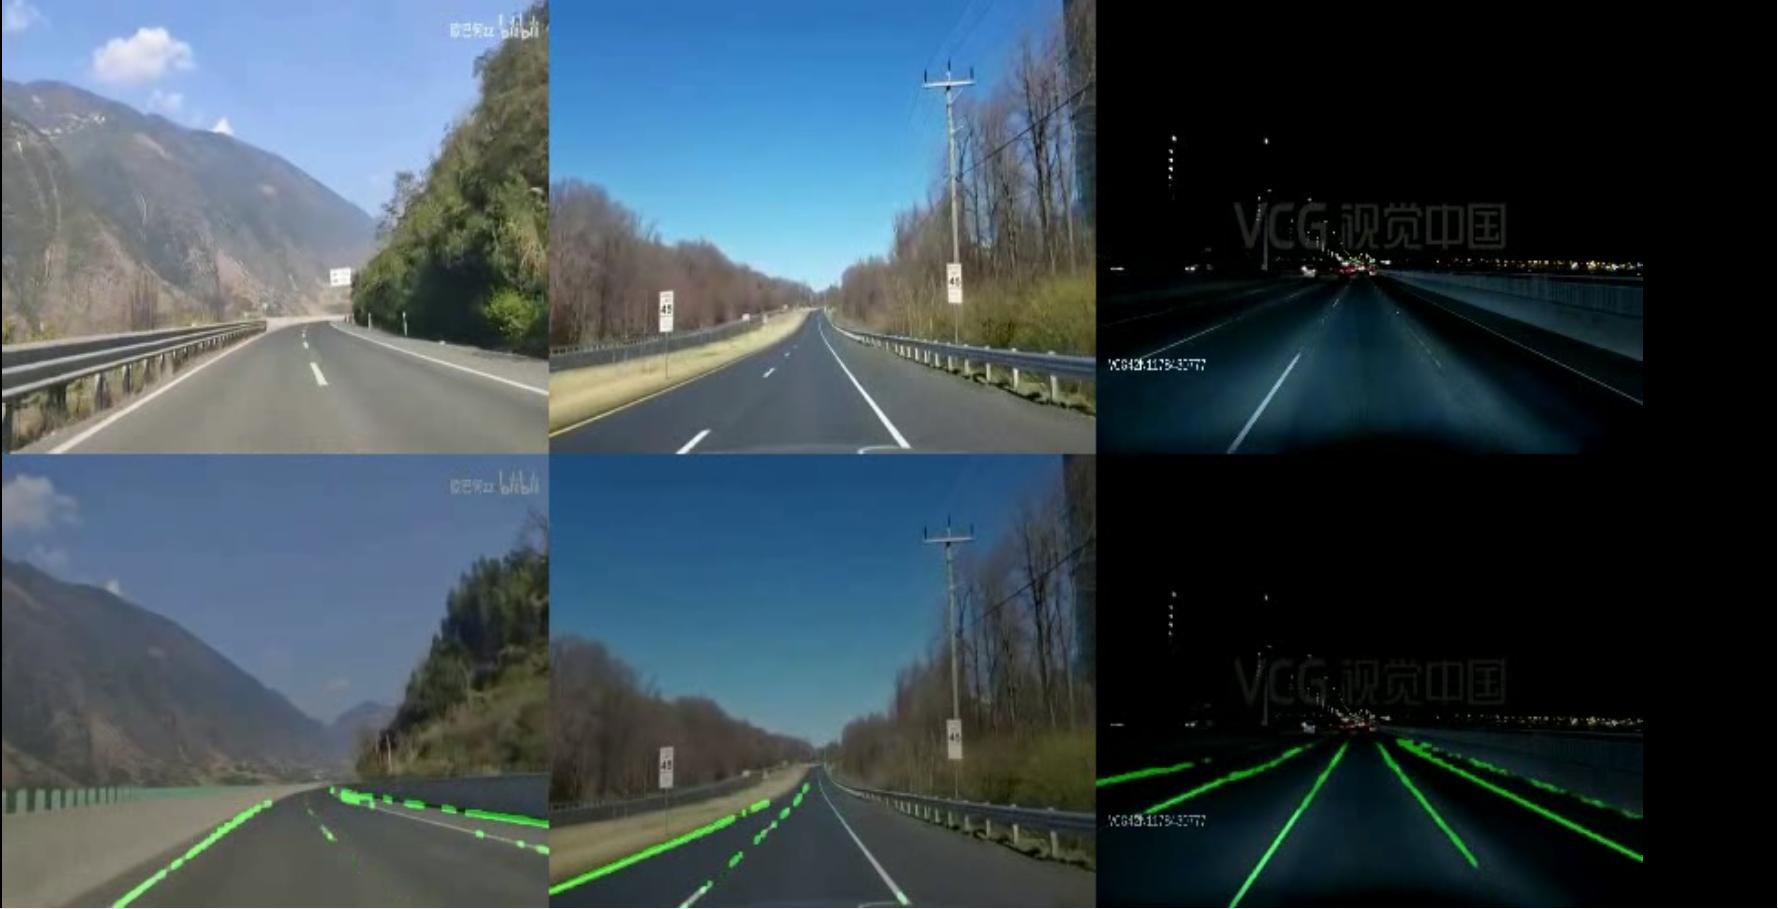

In [3]:
# 实现效果.
from IPython.display import Image

Image(filename='./输出效果/15015.jpg', width=500)